In [1]:
from PIL import Image
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import Xception


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
TRAIN_DIR = './imgs/train'

datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)


train_generator = datagen.flow_from_directory(
    TRAIN_DIR,(224, 224),
    subset='training'
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,(224, 224),
    subset='validation'
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [3]:
vgg_model = VGG16(weights='imagenet', include_top=False,
    input_shape=(224, 224, 3),
    pooling="max")
out1 = Dropout(0.5)(vgg_model.output)
out2 = Dense(10, activation="softmax")(out1)

vgg_model2 = Model(inputs=vgg_model.input, outputs=out2)
ad= SGD(lr=0.001)

vgg_model2.compile(loss='categorical_crossentropy', optimizer=ad, metrics=['accuracy'])

print(vgg_model2.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:

os.environ['CUDA_VISIBLE_DEVICES'] = '0' # 使用 GPU 0
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# # import tensorflow as tf
# # tf.test.is_gpu_available()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5908517336808138233
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4963368960
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13541337763259009139
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:07:00.0, compute capability: 7.5"
]


In [5]:
hist = vgg_model2.fit_generator(generator=train_generator, epochs=4, validation_data=val_generator, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 561 steps, validate for 141 steps
Epoch 1/4
561/561 [==============================] - 230s 410ms/step - loss: 1.7341 - accuracy: 0.3976 - val_loss: 0.4744 - val_accuracy: 0.8652
Epoch 2/4
561/561 [==============================] - 220s 392ms/step - loss: 0.4126 - accuracy: 0.8728 - val_loss: 0.0982 - val_accuracy: 0.9743
Epoch 3/4
561/561 [==============================] - 218s 388ms/step - loss: 0.1845 - accuracy: 0.9443 - val_loss: 0.0765 - val_accuracy: 0.9806
Epoch 4/4
561/561 [==============================] - 218s 389ms/step - loss: 0.1167 - accuracy: 0.9662 - val_loss: 0.0683 - val_accuracy: 0.9804


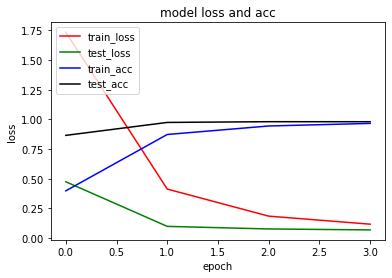

In [6]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='g')
plt.plot(hist.history['accuracy'],color='b')
plt.plot(hist.history['val_accuracy'],color='k')
plt.title('model loss and acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left')
plt.show()

In [10]:

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np


img_path = './imgs/test/img_42.jpg'
img = image.load_img(img_path,target_size=(224, 224))
res = image.img_to_array(img)
res = np.expand_dims(res, axis=0)
res = preprocess_input(res)
preds = vgg_model2.predict(res)
print(preds)


[[0.0000000e+00 9.3615885e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.2379135e-26 3.0436607e-28 1.1940027e-22]]
